<a href="https://colab.research.google.com/github/zhuzz12/cvdl/blob/main/DL_W9_fuzzy_C_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
import numpy as np

In [ ]:
n_samples = 100

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

In [ ]:
X

array([[-1.36512441, -2.18991529],
       [-2.90618749, -2.06408554],
       [-1.33073332, -1.90697646],
       [-2.61777366, -0.92950849],
       [-0.09415973, -1.06926958],
       [-1.75734756, -1.44809795],
       [-1.52268797, -1.28072308],
       [-2.32007367,  0.20275884],
       [-3.52746457, -4.26625784],
       [-3.09841452, -1.02958575],
       [-1.77550396, -0.99217564],
       [-3.61451314, -1.59659549],
       [-2.47385526,  0.23123778],
       [-3.08331987, -3.60284355],
       [-1.69809902,  1.26285385],
       [-1.37842957, -1.55155235],
       [-0.46855136, -1.99437171],
       [-3.84059886, -1.7190165 ],
       [-1.26466921, -1.57541699],
       [-2.48714553, -0.8723242 ],
       [-0.84483119, -1.11770078],
       [-3.11554833, -2.04310151],
       [-2.08899401, -2.5011011 ],
       [-1.25247533, -2.6970239 ],
       [-2.03534959, -1.51280585],
       [-0.62152096,  0.92525862],
       [-1.3704875 , -3.05163323],
       [-3.61919946, -1.25511314],
       [-0.33766396,

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [ ]:
X.shape

(200, 2)

[[-1.98901942 -2.05375221]
 [ 2.03996042  1.98989386]]


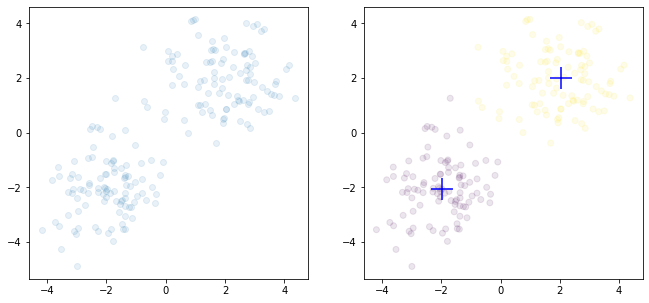

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters= 2)

In [ ]:
label = kmeans.fit_predict(X)

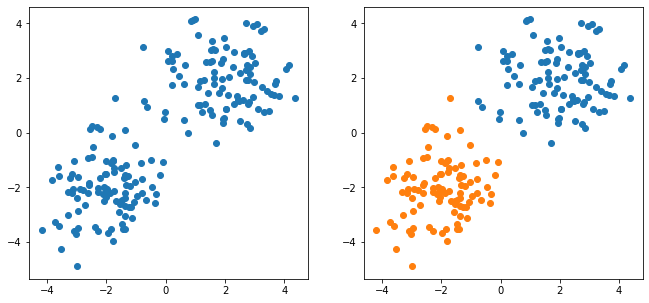

In [ ]:
#filter rows of original data
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
f, axes = plt.subplots(1, 2, figsize=(11,5))
#plotting the results
axes[0].scatter(X[:,0], X[:,1], alpha=1)
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

#**Task: You need to implement the algorithm with numpy only**

In [ ]:
class fuzzyCMeans():
    def __init__ (self, c, m, e=0.01, max_iter = 10, random_state= 15):
        self.c = c
        self.m = m
        self.e = e
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers = None
    
    def initialize_membership (self, X): 
        np.random.RandomState(self.random_state)  # initialize matrix with zeros
        M_init = np.zeros((self.c, X.shape[0]))   # randomly assign to clusters
        M_init[np.random.randint(0, self.c, size= (X.shape[0]), dtype=int), np.arange(X.shape[0])] = 1.;
        return M_init

    def compute_centroids(self, X, M ):
        V = np.matmul(np.power(M, self.m), X)/np.sum(np.power(M, self.m), axis = 1).reshape(-1,1)
        return V
    
    def compute_distance(self, X, V):
        D = []
        for cluster in V:
            D.append(np.linalg.norm(X -cluster, axis = 1))
        D = np.array(D)
        return D

    def update_membership(self, D):
        M = []
        for i in range(self.c): # Update membership functions for each cluster
            D_cur = np.repeat(D[i, :].reshape(1, -1), self.c, axis = 0)
            M.append(1/np.sum(np.power(D_cur/D, (2/(self.m-1))), axis = 0))
        M = np.array(M)
        return M

    def fit (self, X): 
        M = self.initialize_membership(X)
        V = None
        i = 0 
        e = 10
        while ((i < self.max_iter) and (e >= self.e)):
            V = self.compute_centroids(X, M)
            D = self.compute_distance(X, V)
            M_prev = M
            M = self.update_membership(D)
            diff = np.max(M-M_prev)
            i += 1
        self.centers = V
        return 


    def predict(self, X):
        D = self.compute_distance(X, self.centers)
        labels = np.argmin(D, axis = 0)
        return labels


In [ ]:
# outputs
fcm_np = fuzzyCMeans(2, 2)
fcm_np.fit(X)
fcm_np_centers = fcm_np.centers
print("centers: \n", fcm_np_centers)

fcm_np_labels = fcm_np.predict(X)
print("\nlabels: \n", fcm_np_labels)


centers: 
 [[-1.98901966 -2.05375276]
 [ 2.03995983  1.98989369]]

labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


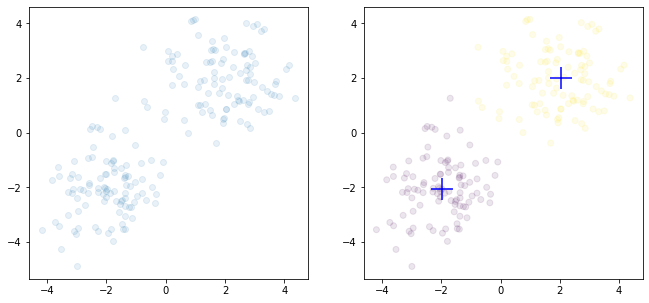

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_np_labels, alpha=.1)
axes[1].scatter(fcm_np_centers[:,0], fcm_np_centers[:,1], marker="+", s=500, c='b')
plt.show()